In [7]:
!pip install matplotlib seaborn pandas --quiet


/tmp/ipykernel_2659495/392358605.py:60: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='Metric', y='Score', hue='Evaluation', data=combined_data,


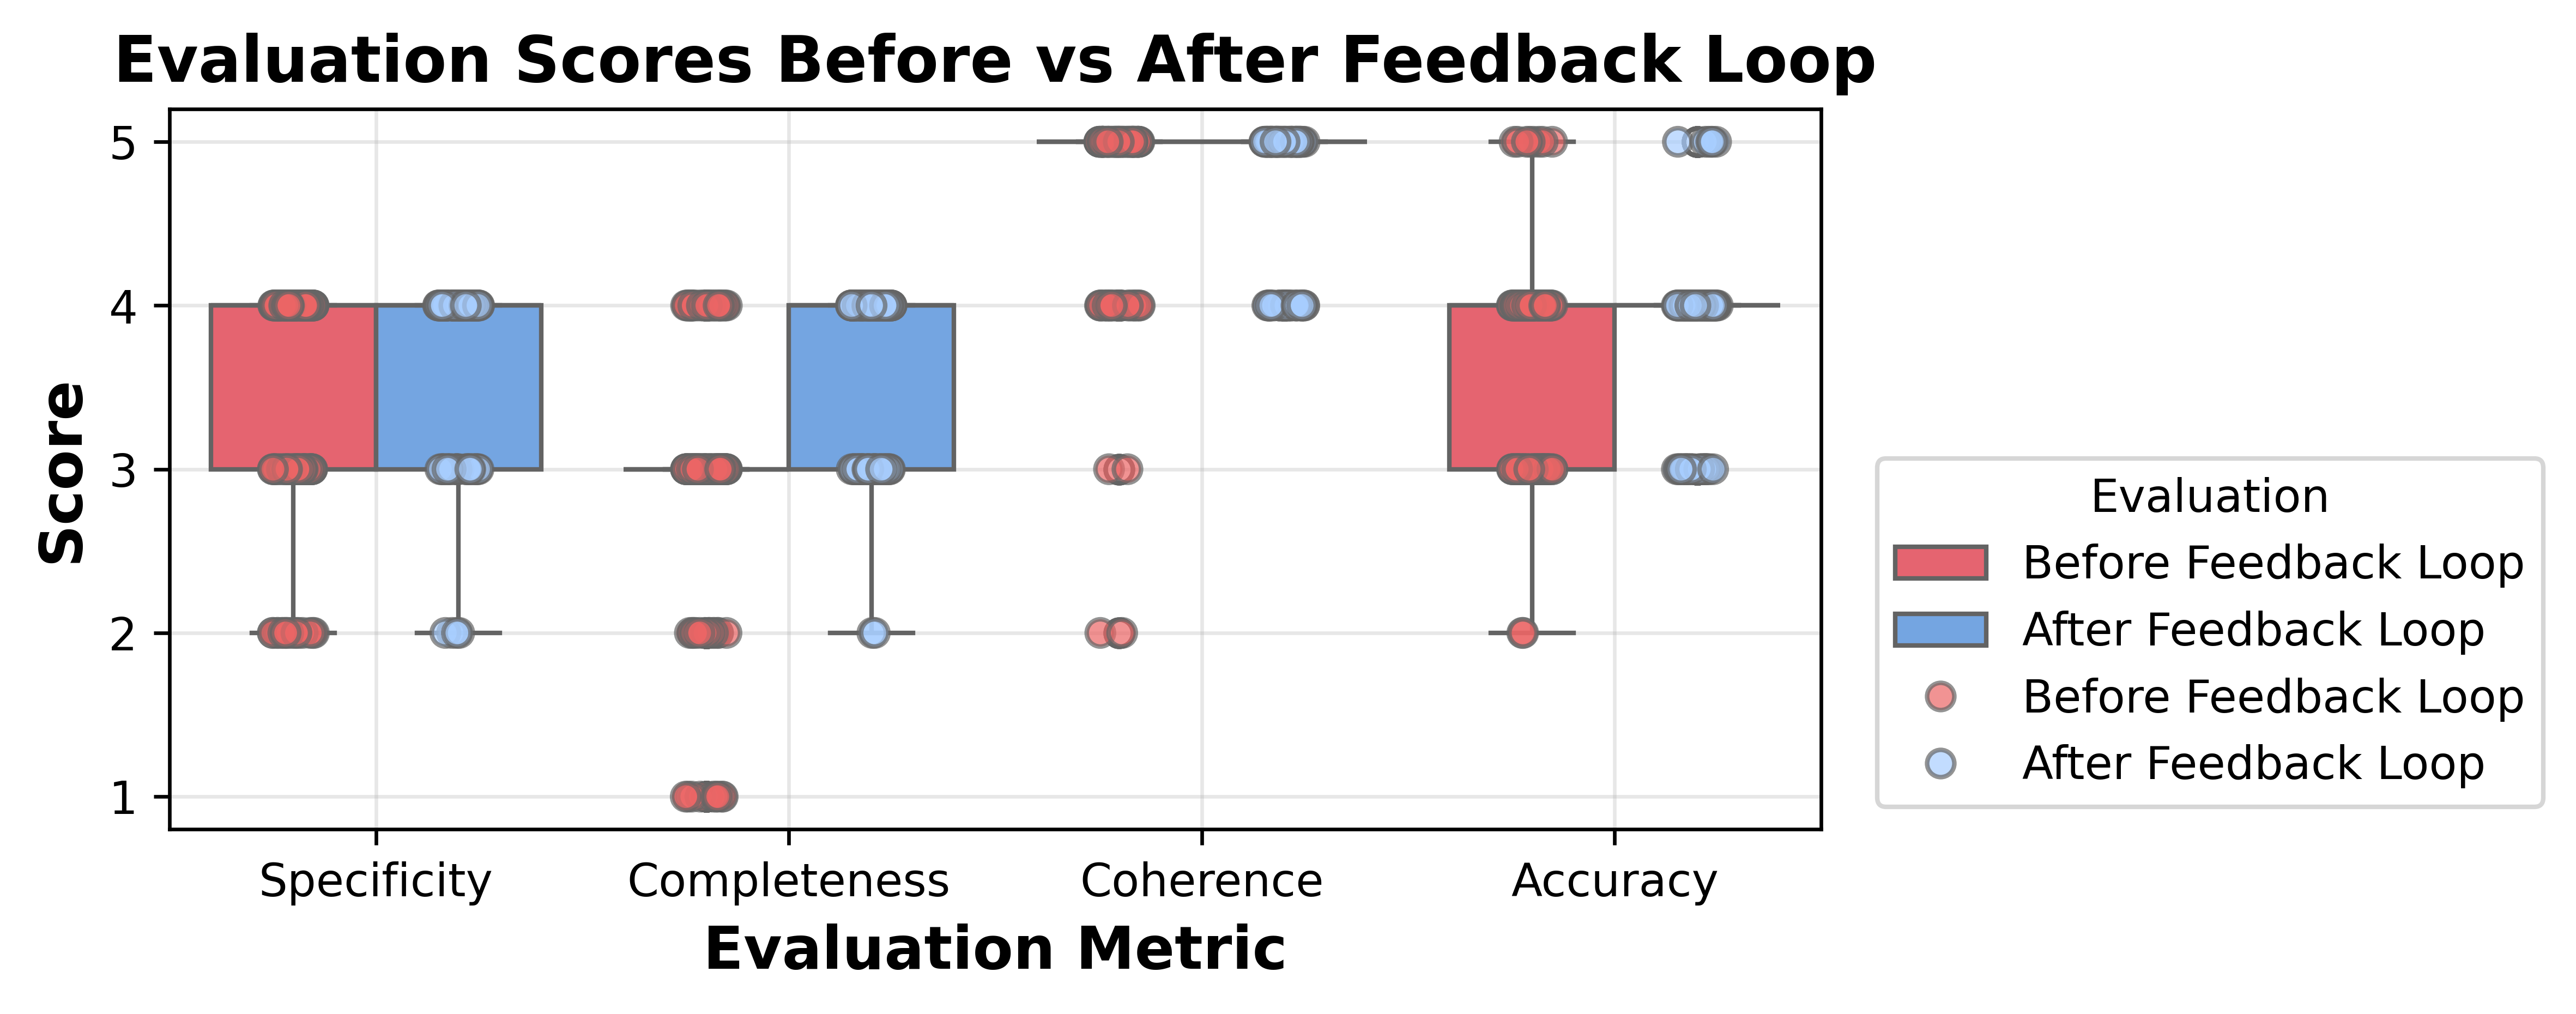

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


original_file_path = "/home/users/nblair7/ai-psychiatrist/slurm/out/initial_scores_results.csv"  
reevaluated_file_path = "/data/users2/nblair7/analysis_results/qual_scores_GEMMA.csv"  

original_df = pd.read_csv(original_file_path)
reevaluated_df = pd.read_csv(reevaluated_file_path)

original_df = original_df.rename(columns={'Participant_ID': 'participant_id'})

# Extract relevant columns from original evaluation
original_selected = original_df[['participant_id', 'Initial_Coherence', 'Initial_Completeness', 'Initial_Specificity', 'Initial_Accuracy']].copy()

# Rename colummns (initial)
original_selected = original_selected.rename(columns={
    'Initial_Coherence': 'Coherence',
    'Initial_Completeness': 'Completeness',
    'Initial_Specificity': 'Specificity',
    'Initial_Accuracy': 'Accuracy'
})


reevaluated_selected = reevaluated_df[['participant_id', 'coherence_score', 'completeness_score','specificity_score', 'accuracy_score']].copy()

# Rename columns (feedback loop)
reevaluated_selected = reevaluated_selected.rename(columns={
    'coherence_score': 'Coherence',
    'completeness_score': 'Completeness',
    'specificity_score': 'Specificity',
    'accuracy_score': 'Accuracy'
})


original_melt = pd.melt(original_selected,
id_vars=['participant_id'],
value_vars=['Specificity', 'Completeness', 'Coherence', 'Accuracy'],
var_name='Metric',
value_name='Score')
original_melt['Evaluation'] = 'Before Feedback Loop'

reevaluated_melt = pd.melt(reevaluated_selected,
id_vars=['participant_id'],
value_vars=['Specificity', 'Completeness', 'Coherence', 'Accuracy'],
var_name='Metric',
value_name='Score')
reevaluated_melt['Evaluation'] = 'After Feedback Loop'


combined_data = pd.concat([original_melt, reevaluated_melt], ignore_index=True)


fig, ax = plt.subplots(figsize=(8, 3.2))

#boxplot + stripplot
sns.boxplot(x='Metric', y='Score', hue='Evaluation', data=combined_data, ax=ax, palette=["#fb4e5f", "#62a3f3"])
sns.stripplot(x='Metric', y='Score', hue='Evaluation', data=combined_data,
dodge=True, size=6, alpha=0.7,
linewidth=1, edgecolor="gray", ax=ax, palette=["#ec6666", "#a8ceff"])

ax.set_title('Evaluation Scores Before vs After Feedback Loop', fontsize=14, fontweight='bold')
ax.set_xlabel('Evaluation Metric', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)

# x/y ticks
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_yticks(range(int(combined_data['Score'].min()), int(combined_data['Score'].max()) + 1))


ax.legend(title='Evaluation', fontsize=10, title_fontsize=10, bbox_to_anchor=(1.02, 0), loc='lower left', ncol=1)

# dpi
plt.rcParams['figure.dpi'] = 600
plt.tight_layout()
plt.savefig('OriginalvsReEval.pdf', format='pdf', bbox_inches='tight')
plt.show()

/tmp/ipykernel_2659495/1848602325.py:51: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='Metric', y='Score', hue='Evaluator', data=combined_data, dodge=True, size=6, alpha=0.7, linewidth=1, edgecolor="gray", ax=ax,


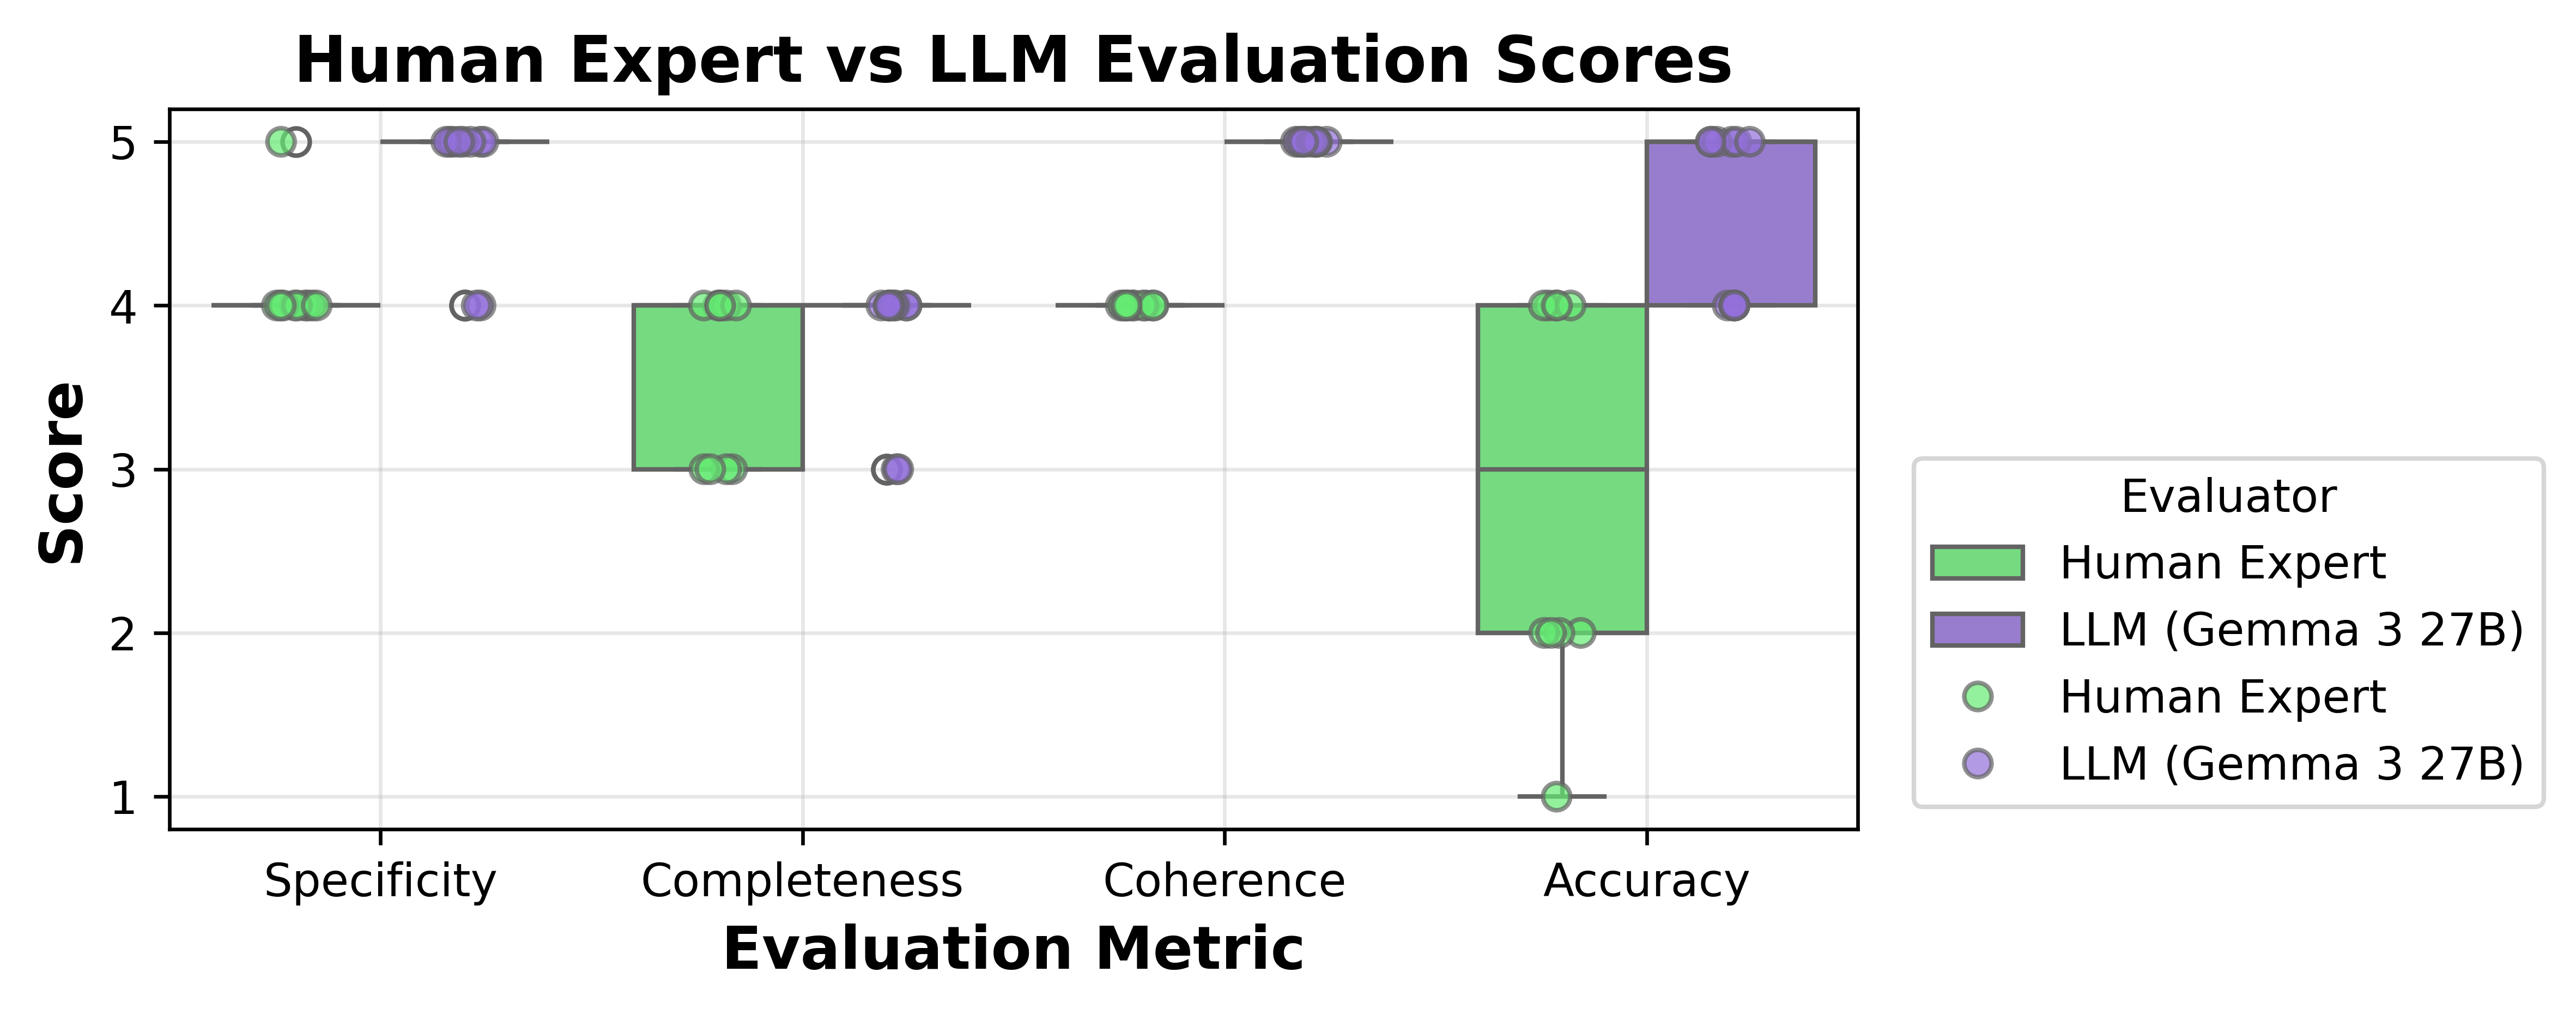

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Expert evaluation
expert_evaluation = {
    "Participant_ID": [305, 322, 345, 346, 348, 367, 376, 380, 406, 416],
    "Specificity":    [4, 4, 4, 5, 4, 4, 4, 4, 4, 4],
    "Completeness":   [3, 3, 3, 4, 3, 4, 4, 4, 4, 4],
    "Coherence":      [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
    "Accuracy":       [2, 2, 1, 4, 2, 4, 4, 4, 4, 2]
}

# LLM evaluation
llm_evaluation = {
    "Participant_ID": [305, 322, 345, 346, 348, 367, 376, 380, 406, 416],
    "Specificity":    [4, 4, 5, 5, 5, 5, 5, 5, 5, 5],
    "Completeness":   [4, 4, 3, 4, 4, 4, 4, 3, 4, 4],
    "Coherence":      [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    "Accuracy":       [4, 4, 5, 5, 5, 5, 5, 4, 5, 4]
}


expert_df = pd.DataFrame(expert_evaluation)
llm_df = pd.DataFrame(llm_evaluation)


expert = pd.melt(expert_df,
id_vars=['Participant_ID'], 
value_vars=['Specificity', 'Completeness', 'Coherence', 'Accuracy'], var_name='Metric',
value_name='Score')
expert['Evaluator'] = 'Expert'

llm = pd.melt(llm_df, id_vars=['Participant_ID'],
value_vars=['Specificity', 'Completeness', 'Coherence', 'Accuracy'],
var_name='Metric',
value_name='Score')
llm['Evaluator'] = 'LLM'

# Combine data
combined_data = pd.concat([expert, llm], ignore_index=True)
combined_data['Evaluator'] = combined_data['Evaluator'].replace('Expert', 'Human Expert')
combined_data['Evaluator'] = combined_data['Evaluator'].replace('LLM', 'LLM (Gemma 3 27B)')

# sizing
fig, ax = plt.subplots(figsize=(8, 3.2))

# boxplot scores
sns.boxplot(x='Metric', y='Score', hue='Evaluator', data=combined_data, ax=ax, palette=["#65eb73", "mediumpurple"])
sns.stripplot(x='Metric', y='Score', hue='Evaluator', data=combined_data, dodge=True, size=6, alpha=0.7, linewidth=1, edgecolor="gray", ax=ax,
 palette=["#65eb73", "mediumpurple"])

ax.set_title('Human Expert vs LLM Evaluation Scores', fontsize=14, fontweight='bold')
ax.set_xlabel('Evaluation Metric', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)

#x/y ticks
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

ax.set_yticks(range(int(combined_data['Score'].min()), int(combined_data['Score'].max()) + 1))

# legend
ax.legend(title='Evaluator', fontsize=10, title_fontsize=10, 
bbox_to_anchor=(1.02, 0), loc='lower left', ncol=1)

#dpi
plt.rcParams['figure.dpi'] = 600
plt.tight_layout()
plt.savefig('HumanVsLLM.pdf', format='pdf', dpi=1000, bbox_inches='tight')
plt.show()